# K-Nearest Neighbors(KNN)
**Agenda**
- Review of the iris dataset
- Human learning on the iris dataset
- The Data Science method and K-nearest neighbors (KNN) classification
- Tuning a KNN model
- Comparing KNN with other models


**Lesson goals**
- Learn how the modeling process works
- Learn how scikit-learn works
- Learn how KNN works



## Review of the iris dataset

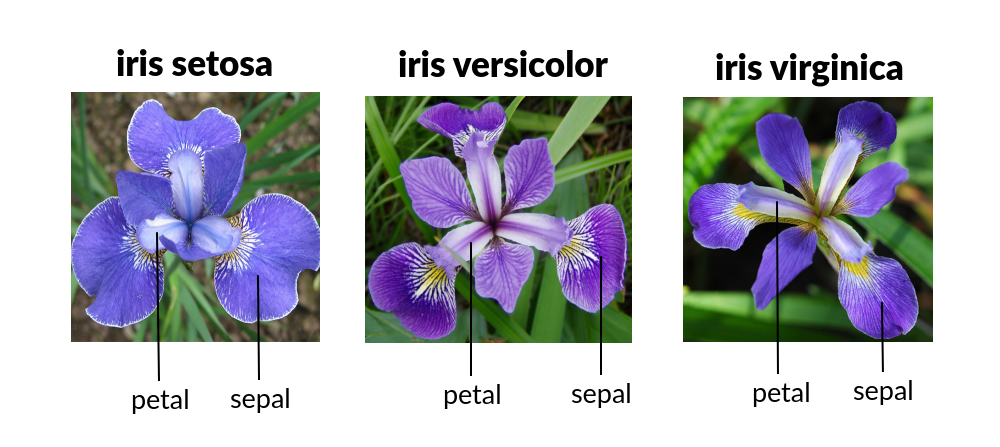

Review of the iris dataset
Before getting into KNN lets start by understanding the dataset 
Question: Can you predict the species of an iris using petal and sepal measurements?

    Read the iris data into a Pandas DataFrame, including column names.
    Gather some basic information about the data.
    Use sorting, split-apply-combine, and/or visualization to look for differences between species.
    Write down a set of rules that could be used to predict species based on iris measurements.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14


Task 1

Read the iris data into a pandas DataFrame, including column names. Name the dataframe iris.
source of .csv file 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
Let's start by taking a look at the file.

In [ ]:
# define the URL from which to retrieve the data (as a string)
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(url)
iris

1) does not look like this data has any headers?
2) we will save some time in class but you would want to review the metadata found normally at the source
to discover what the headers should be. 
Let's first solve the header problem. 


In [ ]:
col_names= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(url, header=0, names=col_names)
iris

In [ ]:
# are there any na fields 
iris.isnull().sum()

In [ ]:
# if we were putting this into production and wanted to future proof for NA we could do something lik this
# and here we have just 1 example of a data load script, there are several.

col_names= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(url, header=0, names=col_names, na_filter=False)
iris.head()

Task 2

Gather some basic information about the data such as:

    shape
    head
    data types of the columns
    describe
    counts of the values in the column species
    count the nulls

In [ ]:
# how many observations, 
# how many attributes
iris.shape

In [ ]:
# what do the values look like
iris.values

In [ ]:
# What are the datatypes
iris.dtypes

In [ ]:
# count by categories ie how many of each species
iris.species.value_counts()

In [ ]:
# what are the basic stats for each species
iris.describe()

Task 3

Use sorting, split-apply-combine, and/or visualization to look for differences between species.


In [ ]:
# Sort the values in the petal_width column and display them

iris.sort_values(by='petal_width')

In [ ]:
# Find the mean of all numeric columns grouped by species

iris.groupby('species').mean()

In [ ]:
# Get the describe information for all numeric columns grouped by species
iris.groupby('species').describe()

In [ ]:
# Generate a histogram of petal_width grouped by species
iris.petal_width.plot(kind='hist')

In [ ]:
# Display a box plot of petal_width grouped by species
iris.groupby('species').plot(kind='box')

In [ ]:
import seaborn as sns
sns.lineplot(data=iris, x="species", y="sepal_length")

In [ ]:
####LINE GRAPH
#sns.lineplot(data=my_data, x="class_label", y="sepal_length")
sns.lineplot(data=iris, x="petal_length", y="sepal_length",  hue = 'species',  legend = 'auto')

In [ ]:
iris.plot(kind ="scatter",
          x ='sepal_length',
          y ='petal_length')
plt.grid()

In [ ]:
# adding color works wonders

sns.set_style("whitegrid")
 
# sepal_length, petal_length are iris
# feature data height used to define
# Height of graph whereas hue store the
# class of iris dataset.
sns.FacetGrid(iris, hue ="species",
              height = 6).map(plt.scatter,
                              'sepal_length',
                              'petal_length').add_legend()



In [ ]:
###PAIR PLOT
sns.pairplot(iris,hue='species')

#### Terminology

    150 observations (n=150): each observation is one iris flower
    4 features (p=4): sepal length, sepal width, petal length, and petal width
    Response: iris species
    Classification problem since response is categorical

## Human learning on the iris dataset
How did we (as humans) predict the species of an iris?

    We observe that the different species had (somewhat) dissimilar measurements.
    We focus on features that seemed to correlate with the response.
    We create a set of rules (using those features) to predict the species of an unknown iris.

We assumed that if an unknown iris has measurements similar to previous irises, then its species is most likely the same as those previous irises.

In [ ]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

# create a custom colormap
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [ ]:
# all features and response need to be numbers for scikit-learn
# map each iris species to a number
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [ ]:
# create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap=cmap_bold) 

In [ ]:
# create a scatter plot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap=cmap_bold)

The more you can gain insights from visualizations the better but lets move on

Task 4

Decide on a set of rules that could be used to predict species based on iris measurements.

In [ ]:
# Define a new feature that represents petal area ("feature engineering")
petal_area= iris.petal_length * iris.petal_width 
petal_area

In [ ]:
iris.columns

In [ ]:
iris['petal_area'] = petal_area
iris.columns

In [ ]:
# Display a describe of petal_area grouped by species
iris.groupby('species').petal_area.describe().unstack()

In [ ]:
# Display a box plot of petal_area grouped by species
iris.boxplot(column='petal_area', by= 'species')

Predicting setosa will be straightforward since all our Iris-setosa pedal_areas are < 2 and the other Iris species have petal_areas larger than 2. But what about the petal_areas of Iris-versicolor and Iris-virginica? Some of their petal_area values overlap. Let's look at that overlap in more detail.

How confident would you be in predicting setosa?
How often do you think it would be accurate?
How accurate do you think it would be?
Let's test it

In [ ]:
iris[(iris.petal_area <=2)]

In [ ]:
# Show only dataframe rows with a petal_area between 7 and 9
iris[(iris.petal_area > 7) & (iris.petal_area < 9)].sort_values('petal_area')

What rules would you create for:
    Rule to predict virginica:
    Rule to predict versicolor:
How confident would you be in predicting setosa?
How often do you think it would be accurate?
How accurate do you think it would be?

### The Data Science Method
We will still do many of the same initial steps of reading data in cleaning, exploring, maybe cleaning some more or adding calculations
so for now let's skip all of that and assume we have done this, since we kind of just did right above. 
scikit-learn's 6-step modeling pattern

Step 1: Create a feature matrix and response vector

Step 2: Decide on the estimator you want to to use and import that class

Step 3: "Instantiate" the "estimator"

Step 4: Fit the model with data (aka "model training")

Step 5: Use the model to predict the response for a new observation

Step 6: Evaluate the error or accuracy of the model


Benefits and drawbacks of scikit-learn

Benefits:

    Consistent interface to machine learning models
    Provides many tuning parameters but with sensible defaults
    Exceptional documentation
    Rich set of functionality for companion tasks
    Active community for development and support

Potential drawbacks:

    Harder (than R) to get started with machine learning
    Less emphasis (than R) on model interpretability

Requirements for working with data in scikit-learn

    Features and response should be separate objects
    Features and response should be entirely numeric
    Features and response should be NumPy arrays (or easily converted to NumPy arrays)
    Features and response should have specific shapes (outlined below)

There are different models we can use but using this quick guide here let's start by jumping into KNN K Nearest Nieghbors

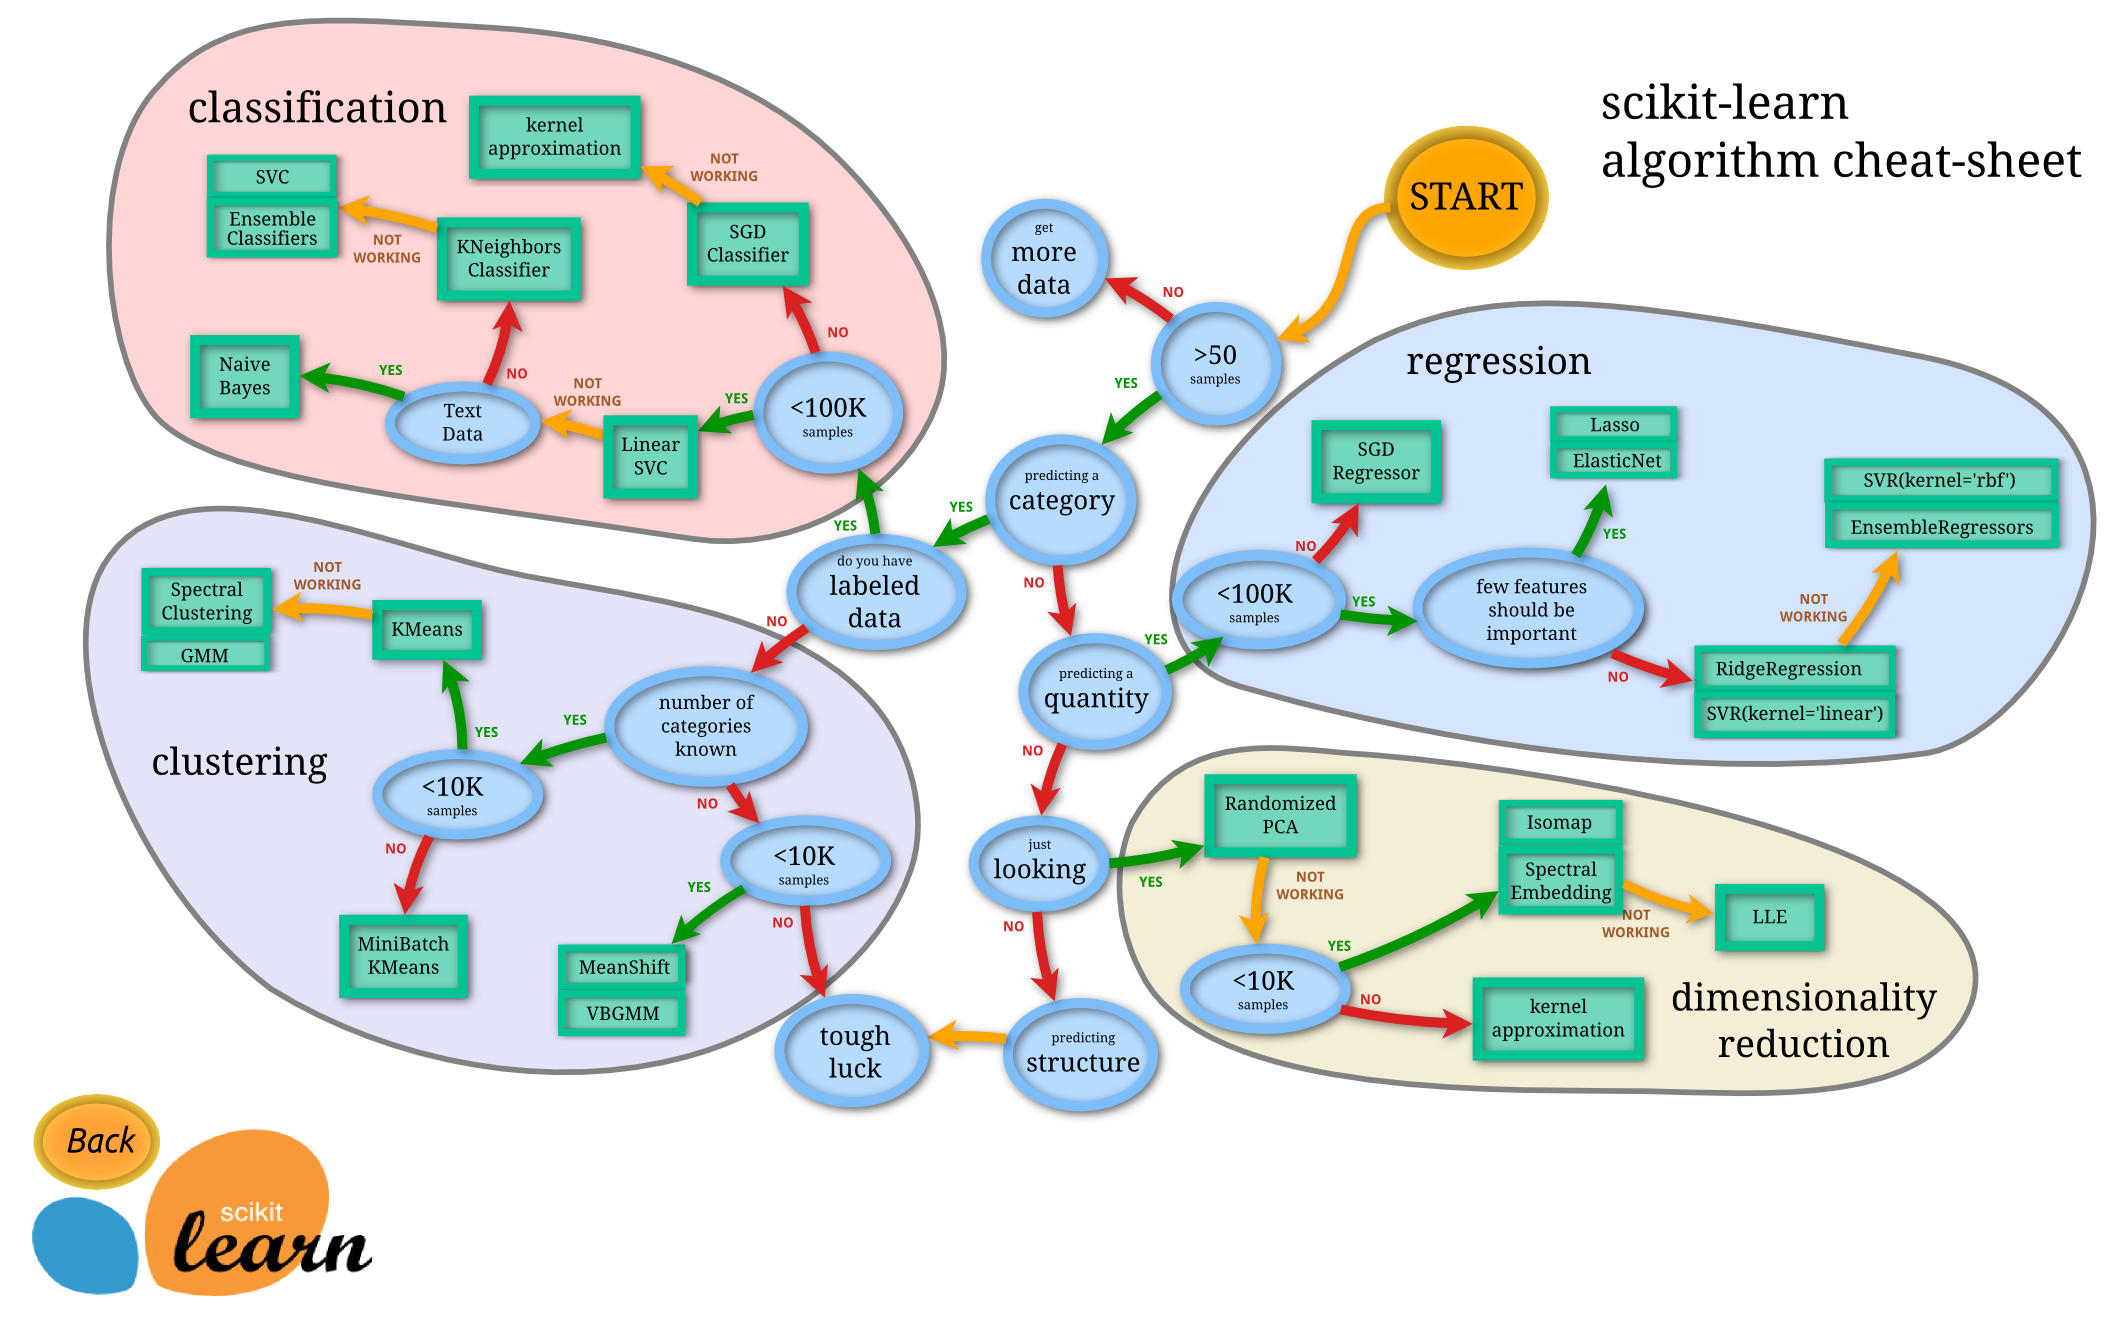

## KNN

![0%20ItVKiyx2F3ZU8zV5.webp](attachment:0%20ItVKiyx2F3ZU8zV5.webp)

This is the birds of a feather flock together model. Meaning based on an unknown variables close nieghbors we maybe able to guess what that variable is. Lets first start with the concept of supervised and unsupervised data first

Some example Use Cases:

    Forecasting stock market: Predict the price of a stock, on the basis of     company performance measures and economic data.
    Currency exchange rate
    Bank bankruptcies
    Understanding and managing financial risk
    Trading futures
    Credit rating
    Loan management
    Bank customer profiling
    Money laundering analyses
    Customer Churn
    Medical identification ie cancer
    Facial recognition
    Text mining, sentiment analysis
    Recommendation systems

How to choose the Value for K?
A small value will create a lot of noise, becoming an ineffective model. 
A high value can overfit and be computationally expensive making it also an ineffective model. 

What determines the right K value?
This will be determined through your valuation of the model and tuning the K parameter for the best fit.

#### What is a fit?
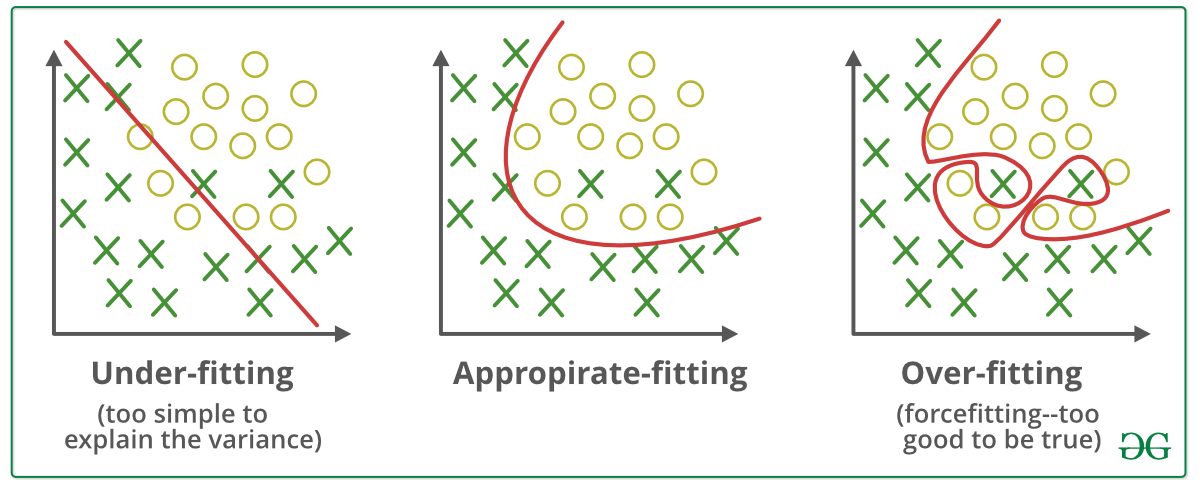

Accepted starting position is to use the square root of the sample set you are using. So, if your sample set 5500 records you could start with k=74. However, another suggestion is to use odd numbers so trying 73 or 75 may be a better place to start from. 


Couldn’t we use a more scientific approach to predict what the best K value would be?
Absolutely! But first let’s start with building a model. 


#### Step 1: Create a feature matrix and response vector

In [ ]:
# all features and response need to be numbers for scikit-learn
# map each iris species to a number
iris['species_num'] = iris.species.map({'Iris-setosa':0, 
                                        'Iris-versicolor':1, 
                                        'Iris-virginica':2})
iris.head()

In [ ]:
# store feature matrix in "X"
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]
print (X)


** alternative ways to create "X"**
- X = iris.drop(['species', 'species_num'], axis=1)
- X = iris.loc[:, 'sepal_length':'petal_width']
- X = iris.iloc[:, 0:4]



In [ ]:
# store response vector in "y"
y = iris.species_num
print(y)

In [ ]:
# check X's type
print(type(X))
print(type(X.values))

In [ ]:
# check y's type
print(type(y))
print(type(y.values))

In [ ]:
# check X's shape (n = number of observations, p = number of features)
print(X.shape)

In [ ]:
# check y's shape (single dimension with length n)
print(y.shape)

#### Step 2: Decide on the estimator you want to to use and import that class

    "Estimator" is scikit-learn's term for "model"
    

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#### Step 3: "Instantiate" the "estimator"

    "Instantiate" means "make an instance of"



In [ ]:
# make an instance of a KNeighborsClassifier object
knn = KNeighborsClassifier(n_neighbors=1)
type(knn)



* Created an object that "knows" how to do K-nearest neighbors classification, and is just waiting for data
* Name of the object does not matter
* Can specify tuning parameters (aka "hyperparameters") during this step
* All parameters not specified are set to their defaults



In [ ]:
print(knn)

#### Step 4: Fit the model with data (aka "model training")
    Model is "learning" the relationship between X and y in our "training data"
    Process through which learning occurs varies by model
    Occurs in-place



In [ ]:
knn.fit(X, y)



    Once a model has been fit with data, it's called a "fitted model"




#### Step 5: Use the model to predict the response for a new observation

    New observations are called "out-of-sample" data
    Uses the information it learned during the model training process



In [ ]:
# Since we used all our data to create the model, let's create a hypothetical new observation to see the prediction
# remember at the beginning 
# 'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2

new_observations = [[1,2, 1, 2],[5,3, 4,7]]
knn.predict(new_observations)

our results are two predictions for the two different inputs. 

In [ ]:
# Create the feature and response
iris['species_num'] = iris.species.map({'Iris-setosa':0, 
                                        'Iris-versicolor':1, 
                                        'Iris-virginica':2})
# store feature matrix in "X"
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]
# choose model
from sklearn.neighbors import KNeighborsClassifier
# insatiate the model
knn = KNeighborsClassifier(n_neighbors=1)
# fit the model
knn.fit(X,y)
# make a prediction
new_observations = [[1,2, 1, 2],[5,3, 4,7]]
knn.predict(new_observations)
# Tune the model <- covered shortly
# Evaluate the model <- covered shortly
# Present findings

In [ ]:
iris['species_num'] = iris.species.map({'Iris-setosa':0, 
                                        'Iris-versicolor':1, 
                                        'Iris-virginica':2})
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
new_observations = [[1,2, 1, 2],[5,3, 4,7]]
knn.predict(new_observations)
# Tune the model <- covered shortly
# Evaluate the model <- covered shortly

### Tuning a KNN Model
How can we test the model and compare results with actuals(did the prediction come true?
How accurate is the result?
What is the right number of neighbors to input


In [ ]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]

In [ ]:

knn.predict(X_new)
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
knn.predict(X_new)

Question: Which model produced the correct predictions for the two unknown irises?

Answer: We don't know, because these are out-of-sample observations, meaning that we don't know the true response values. Our goal with supervised learning is to build models that generalize to out-of-sample data. However, we can't truly measure how well our models will perform on out-of-sample data.

Question: Does that mean that we have to guess how well our models are likely to do?

Answer: Thankfully, no. In the next class, we'll discuss model evaluation procedures, which allow us to use our existing labeled data to estimate how well our models are likely to perform on out-of-sample data. These procedures will help us to tune our models and choose between different types of models.


In [ ]:
# calculate predicted probabilities of class membership
knn.predict_proba(X_new)

if you line these up with predict what you get is the probability of the lables being true
if we look at the first line:
- the probablity of the label being 0 is 0 
- the probabily of the label being 1 is .8 
- the probability of the label being 2 is .2


Let's see what happens when we add the general rules for picking a k-value
- with 149 samples the sqrt = 12
- choosing an odd number would be 11 or 13
- choosing a lower number first would be 11

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
# fit the model with data
knn.fit(X, y)

# predict the response for new observations
knn.predict(X_new)

In [ ]:
# calculate predicted probabilities of class label
knn.predict_proba(X_new)

#### We may need to have more to test in order to pick the right K number
This topic is coming up. How would we get more data to test our model if we only have 1 dataset and no new data?


In [ ]:
# few ways to leverage the basics of python coding ie print and loops

In [ ]:
# for this we will take a look at the Accuracy score the predict  and the actual values
print('Predictions of new inputs species: {}'.format(knn.predict(X_new)))

In [ ]:
for k in [ 1, 5, 7, 9, 11, 12, 13]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    prob = knn.predict_proba(X_new)
    print('probability score: k = {}  probability = {}'.format(k,prob ))
    #print(k)
    #print(prob)

One thing to note is we are predicting a new species but we will need a way to evaluate how well that prediction is. This will be covered in the next unit but just be aware that is the next step in this process. 

### What about KNeighborsRegressor
Where KNN Classifier works great with discrete data where as KNNregressor is better at Continuous data. Consider KNN as a classifier that will dicated output by a majority vote of the surroudning nieghbors. KNNClassifer takes a mean value, which in discrete data could result in "ish" data. IE the iris lable is 1.3 so it is Versicolor(ish)

### Project
You may have an opportunity to practice this with your current data. Are there classifications you could make?



## KNN and Penguins ( short hand look at the workflow)

### Obtain the data

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier as KNN
from seaborn import load_dataset
df = load_dataset('penguins')
print(df.head())

### Understand the data EDA (some prep)

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df['species'].value_counts()

In [ ]:
df.info

In [ ]:
df.describe()

In [ ]:
# not dropping any fields so will drop duplicates now
df = df.drop_duplicates()
df.shape
# we could have counted if there were any duplicates so why do this and not just count?

In [ ]:
df.isnull()

In [ ]:
df.isna().sum()

What would happen if we just droppped NA how many records would we lose?

In [ ]:
# how to view the records that are missing values
df[df['sex'].isna()]

Which records look to be pretty useless?

In [ ]:
df.drop(index=[3,339], inplace=True) # drop records inplace
df.reset_index(inplace=True, drop=True) # reset index and drop old index
df[df['sex'].isna()]

In [ ]:
# we will review more on working with imputing values later for now let's move on with our review
df = df.dropna()
df.shape

In [ ]:
df.describe().transpose()

In [ ]:
# any correlations?
cor_matrix = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm','body_mass_g']].corr()
(cor_matrix) # statisticallly significant?
sns.heatmap(cor_matrix, annot = True)

In [ ]:
sns.set_theme(style='white')
sns.pairplot(df, hue='species')

#### Alot of EDA is exploring and prepping. You may have enough metadata to even prep a little on your data load. 

### Feature Selection
This will be covered in later topics. As you narrow down to features you discover you may iterate back into EDA with those features and additional prep such as Scaling


### Algorithm Select(choosing your model) 
Supervised, unsupervised, labeled, unlabeled
scikit learn decision map
When to use specific models


Before looking at model selection we should understand a few terms that we will start using
Supervised and unsupervised or labled and unlabeld data. 
This images were found on GeeksforGeeks and give a good illustration


With supervised learning the models will have a framework or labels that it can train off of for expected output. IE we have labels of cats and dogs and so ergo we are expecting output of cats and dogs. 


For unsupervised models we do not have labels or training dataset. 


While supervised learning has higher chance of accuracy it will depend on the training data and cannot handle more complex ML like clustering. 


Unsupervised can handle more complexity but does require more compute time and is not as accurate as Supervised.


key differences


**Supervised**
- Supervised learning involves training a machine from labeled data.
- Labeled data consists of examples with the correct answer or classification.
- The machine learns the relationship between inputs (fruit images) and outputs (fruit labels).
- The trained machine can then make predictions on new, unlabeled data.

**Unsupervised**

- Unsupervised learning allows the model to discover patterns and relationships in unlabeled data.
- Clustering algorithms group similar data points together based on their inherent characteristics.
- Feature extraction captures essential information from the data, enabling the model to make meaningful distinctions.
- Label association assigns categories to the clusters based on the extracted patterns and characteristics.


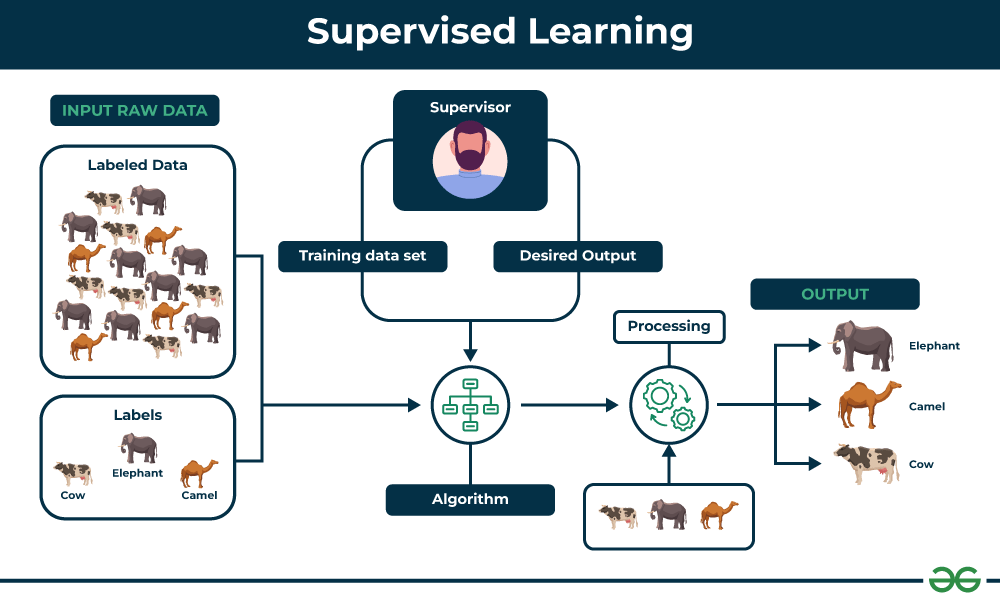


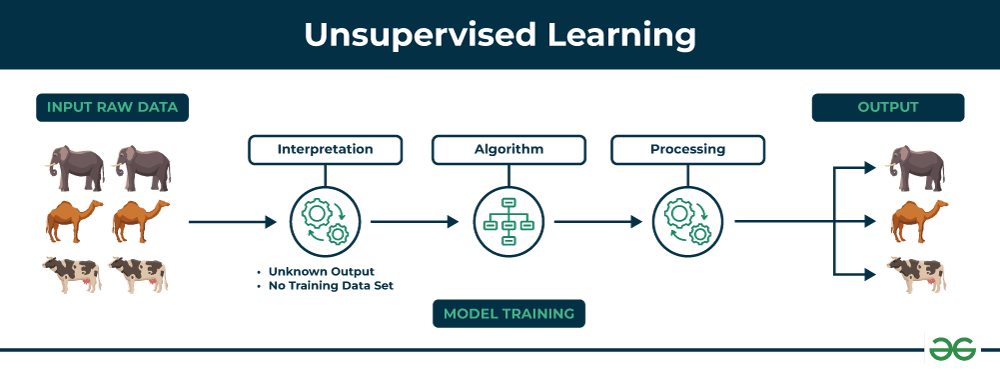

### Models that use supervised
**Regression**
- Linear Regression
- Polynomial Regression
- Support Vector Machine Regression (SVMR)
- Decision Tree Regression
- Random Forest Regression
#### Evaluation of the output from regression
- Mean Squared Error (MSE): MSE measures the average squared difference between the predicted values and the actual values. Lower MSE values indicate better model performance.
- Root Mean Squared Error (RMSE): RMSE is the square root of MSE, representing the standard deviation of the prediction errors. Similar to MSE, lower RMSE values indicate better model performance.
- Mean Absolute Error (MAE): MAE measures the average absolute difference between the predicted values and the actual values. It is less sensitive to outliers compared to MSE or RMSE.
- R-squared (Coefficient of Determination): R-squared measures the proportion of the variance in the target variable that is explained by the model. Higher R-squared values indicate better model fit


**Classification**
- Logistic Regression
- Support Vector Machines(SVM)
- Decision Trees
- Random Forests
- Naive Baye
#### Evaluation of the output from Classification

- Accuracy: Accuracy is the percentage of predictions that the model makes correctly. It is calculated by dividing the number of correct predictions by the total number of predictions.
- Precision: Precision is the percentage of positive predictions that the model makes that are actually correct. It is calculated by dividing the number of true positives by the total number of positive predictions.
- Recall: Recall is the percentage of all positive examples that the model correctly identifies. It is calculated by dividing the number of true positives by the total number of positive examples.
- F1 score: The F1 score is a weighted average of precision and recall. It is calculated by taking the harmonic mean of precision and recall.
- Confusion matrix: A confusion matrix is a table that shows the number of predictions for each class, along with the actual class labels. It can be used to visualize the performance of the model and identify areas where the model is struggling

### Models that use unsupervised 
Common use cases include:
Dimensionality reduction: Reducing the number of features in a dataset while preserving the most important information. Examples include principal component analysis (PCA)
**Clustering**
- Hierarchical clustering
- K-means clustering
- Principal Component Analysis
- Singular Value Decomposition
- Independent Component Analysis
- Gaussian Mixture Models (GMMs)
- Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

**Assocation**
- Apriori Algorithm
- Eclat Algorithm
- FP-Growth Algorithm

#### Evaluation of unsupervised models

- Silhouette score: The silhouette score measures how well each data point is clustered with its own cluster members and separated from other clusters. It ranges from -1 to 1, with higher scores indicating better clustering.
- Calinski-Harabasz score: The Calinski-Harabasz score measures the ratio between the variance between clusters and the variance within clusters. It ranges from 0 to infinity, with higher scores indicating better clustering.
- Adjusted Rand index: The adjusted Rand index measures the similarity between two clusterings. It ranges from -1 to 1, with higher scores indicating more similar clusterings.
- Davies-Bouldin index: The Davies-Bouldin index measures the average similarity between clusters. It ranges from 0 to infinity, with lower scores indicating better clustering.
- F1 score: The F1 score is a weighted average of precision and recall, which are two metrics that are commonly used in supervised learning to evaluate classification models. However, the F1 score can also be used to evaluate non-supervised learning models, such as clustering models.



### Consolidated list of models in thier categories. 
**Regression**
- Linear Regression
- Polynomial Regression
- Support Vector Machine Regression (SVMR)
- Decision Tree Regression
- Random Forest Regression
- SGD Regressor
- Lasso
- SVR
- RidgeRegression
- Stepwise regression

**Classification**
- Logistic Regression
- Support Vector Machines(SVM)
- Decision Trees
- Random Forests
- Naive Bayes
- SGD Classifier
- Linear SVC
- KNeighbors
- SVC
- Linear discriminant analysis

**Clustering**
- Hierarchical clustering
- K-means clustering
- Principal Component Analysis
- Singular Value Decomposition
- Independent Component Analysis
- Gaussian Mixture Models (GMMs)
- Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
- Spectral
- Meanshift VBGMM

**Dimensionality Reduction**
- Randomised PCA
- Isomap
- LLE
- Kernal approximation

**Time Series**
- Arima
- Sarima
- Sarimax

**Neural Network models(both classification and regression**
- Deep Belief Networks
- Hierarchical Temporal Memory
- Deep Learning

**Other**
- Gradient boosting (Boosting many weak predictive models into one strong one)


For the penguin data set which model do you think we should be using?

Let's try a basic hypothesis that we can determine the species of a penguin by certain features
Challenge re-write this code to attempt solving the above hypothesis

In [ ]:
iris['species_num'] = iris.species.map({'Iris-setosa':0, 
                                        'Iris-versicolor':1, 
                                        'Iris-virginica':2})
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
new_observations = [[1,2, 1, 2],[5,3, 4,7]] # these were hard coded metrics to simulate test data
knn.predict(new_observations)
# Tune the model
for k in [ 1, 5, 7, 9, 11, 12, 13]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    prob = knn.predict_proba(X_new)
    print('probability score: k = {}  probability = {}'.format(k,prob ))
    #print(k)
    #print(prob)
# Evaluate the model <- covered shortly

### Review
There are a few steps when choosing a model and other factors to consider.
Such as Mapping attributes to numeric labels. Later we will learn more about concepts and techniques such as dummy variables and one-hot encoding.  While this could still be considered part of data preperation it sometimes only comes up when you are choosing features or refining your hypothesis. 

We also learned that modeling is a fairly brief exercise and understanding the data, prepping the data evaluating the data takes up a majority of our attention. This evaluation will continue as we begin to look into evaluating our models. 

There was also challenge in this unit of hard coding new observations. In the next unit we will address this with Test Train Split

KNN is a fun and model to learn from and continual build on. There are a lot of models out there and we will have time to review the popular ones and give some examples. 
